In [241]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [242]:
# values and attributes should be list
def plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance):

    # Figure Size
    fig, ax = plt.subplots(figsize = fig_size)
    
    # Horizontal Bar Plot
    ax.barh(attributes, values)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    
    # Show top values 
    ax.invert_yaxis()
    
    # Add annotation to bars
    for i, attribute in zip(ax.patches, attributes):
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
        print(attribute)
        #print(attributes_with_performance['ma'][attribute])
        plt.text(i.get_width()+300, i.get_y()+0.5, 
                ("ma: %.3f" % attributes_with_performance['ma'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='black')
        plt.text(i.get_width()+600, i.get_y()+0.5, 
                ("acc: %.3f" % attributes_with_performance['acc'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='red')
        plt.text(i.get_width()+900, i.get_y()+0.5, 
                ("f1: %.3f" % attributes_with_performance['f1'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='green')
        plt.text(i.get_width()+1200, i.get_y()+0.5, 
                ("prec: %.3f" % attributes_with_performance['prec'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='orange')
    
    # Add Plot Title
    ax.set_title(legendName,
                loc ='left', )
    

    plt.savefig(namePlot) 

In [243]:
pathToAppearsTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_test.csv'
pathToAppearsVal = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_val.csv'
pathToAppearsTrain = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_train.csv'

pathToMaTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/testing_ma_605.csv'
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/testing_f1_605.csv'
pathToAccTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/testing_acc_605.csv'
pathToPrecTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PA100k/testing_prec_605.csv'

In [244]:
test_dt = pd.read_csv(pathToAppearsTest, sep='\t', index_col=False)

test_dt_ma = pd.read_csv(pathToMaTest, sep=';', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=';', index_col=False)
test_dt_acc = pd.read_csv(pathToAccTest, sep=';', index_col=False)
test_dt_prec = pd.read_csv(pathToPrecTest, sep=';', index_col=False)

In [245]:
strMa = 'testing_*_ma_*'
strNotMa = 'testing_ma_605'
notColumn = 'Unnamed: 0'
attributes = list(test_dt.columns)
attributes.remove(notColumn)

# fix this
#attributes.remove('HoldObjectsInFront')
#attributes.remove('UpperSplice')

bestStep = 8

attributes_with_performance = {}
attributes_with_performance['ma'] = {}
attributes_with_performance['f1'] = {}
attributes_with_performance['acc'] = {}
attributes_with_performance['prec'] = {}
for attribute in attributes:
    for typeKey in test_dt_ma['key'].unique():
        if attribute in typeKey and 'ma' in typeKey:
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)
        # this elif is because the mlflow metric does not accept & and the original attribute is skirt&dress
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)

    for typeKey in test_dt_f1['key'].unique():
        if attribute in typeKey and 'f1' in typeKey:
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)

    for typeKey in test_dt_acc['key'].unique():
        if attribute in typeKey and 'acc' in typeKey:
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)

    for typeKey in test_dt_prec['key'].unique():
        if attribute in typeKey and 'prec' in typeKey:
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)

In [246]:
test_dt_ma['key'].unique()

array(['learning_rate', 'testing_ma_605', 'testing_Age18-60_ma_605',
       'testing_AgeLess18_ma_605', 'testing_AgeOver60_ma_605',
       'testing_Age18-60_label_acc_605', 'testing_Age18-60_label_f1_605',
       'testing_Age18-60_label_neg_recall_605',
       'testing_Age18-60_label_pos_recall_605',
       'testing_Age18-60_label_prec_605', 'testing_f1_605',
       'testing_acc_605', 'testing_rec_605', 'testing_prec_605',
       'testing_Back_ma_605', 'testing_Backpack_ma_605',
       'testing_Female_ma_605', 'testing_Front_ma_605',
       'testing_Glasses_label_prec_605', 'testing_Glasses_ma_605',
       'testing_HandBag_ma_605', 'testing_Hat_ma_605',
       'testing_HoldObjectsInFront_ma_605', 'testing_LongCoat_ma_605',
       'testing_LongSleeve_ma_605', 'testing_LowerPattern_ma_605',
       'testing_LowerStripe_ma_605', 'testing_ShortSleeve_ma_605',
       'testing_Shorts_ma_605', 'testing_ShoulderBag_ma_605',
       'testing_Side_ma_605', 'testing_SkirtDress_ma_605',
       'test

In [247]:
attributes_with_performance['ma']

{'Female': 0.981737,
 'AgeOver60': 0.980438,
 'Age18-60': 0.9936,
 'AgeLess18': 0.995116,
 'Front': 0.960736,
 'Side': 0.931782,
 'Back': 0.986086,
 'Hat': 0.987252,
 'Glasses': 0.923108,
 'HandBag': 0.971043,
 'ShoulderBag': 0.977434,
 'Backpack': 0.986086,
 'HoldObjectsInFront': 0.960736,
 'ShortSleeve': 0.995252,
 'LongSleeve': 0.995271,
 'UpperStride': 0.964916,
 'UpperLogo': 0.94687,
 'UpperPlaid': 0.922372,
 'UpperSplice': 0.972472,
 'LowerStripe': 0.886702,
 'LowerPattern': 0.90126,
 'LongCoat': 0.965733,
 'Trousers': 0.992528,
 'Shorts': 0.991809,
 'Skirt&Dress': 0.99162,
 'boots': 0.848644}

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


Female
AgeOver60
Age18-60
AgeLess18
Front
Side
Back
Hat
Glasses
HandBag
ShoulderBag
Backpack
HoldObjectsInFront
ShortSleeve
LongSleeve
UpperStride
UpperLogo
UpperPlaid
UpperSplice
LowerStripe
LowerPattern
LongCoat
Trousers
Shorts
Skirt&Dress
boots


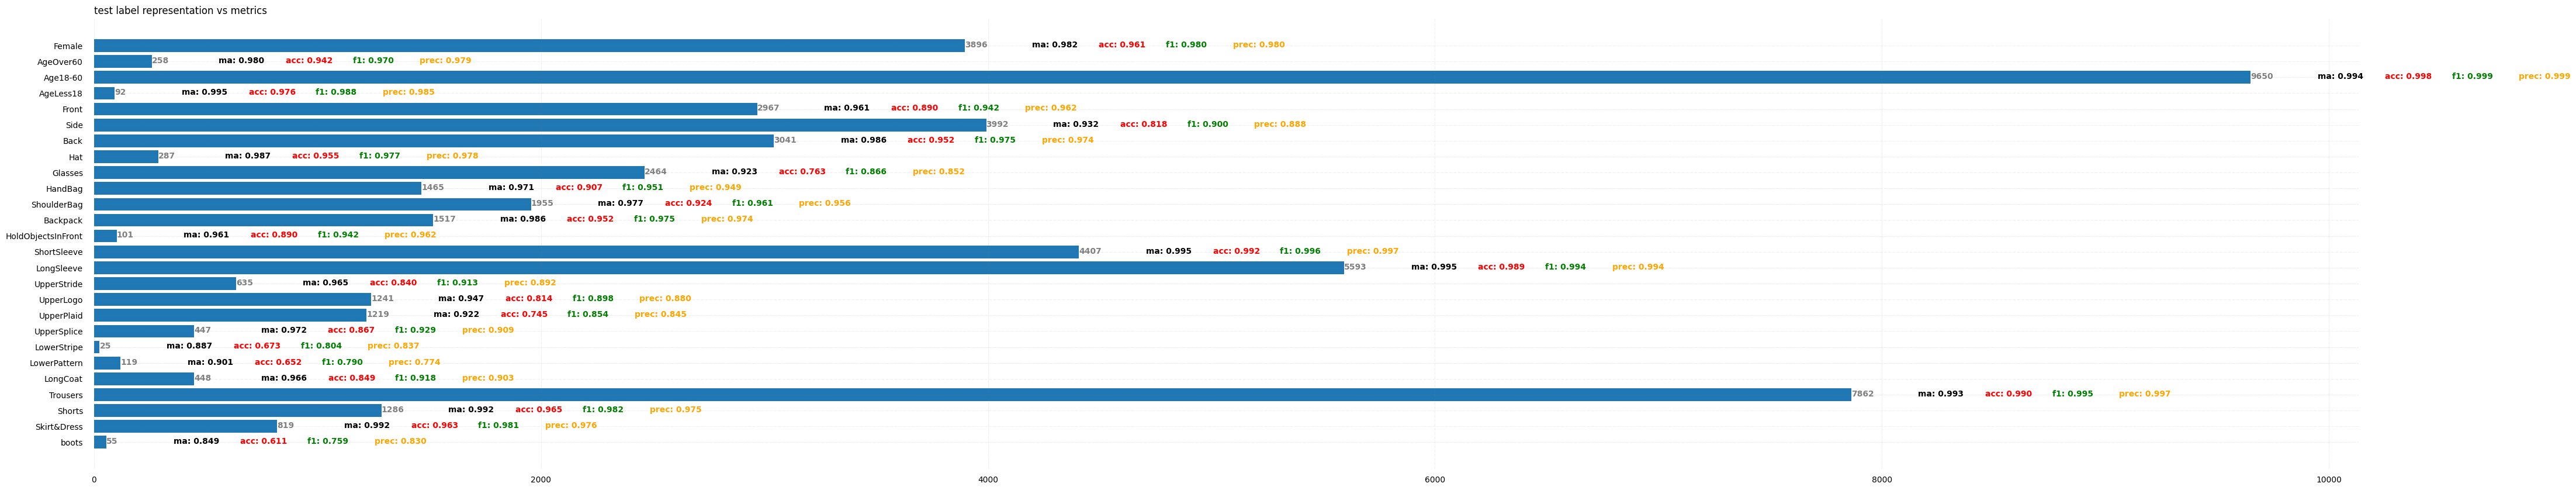

In [248]:
folderToSave="PA100k/"
values = list(test_dt[attributes].sum())
attributes = attributes
namePlot = folderToSave+'_test_bar_rethinking_dummy.png'
legendName = 'test label representation vs metrics'
fig_size = (50, 10)
#plotBarRepresentation(fig_size, values, attributes, namePlot, legendName)
plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance)